### Install DICES client software

This step is only necessary once on most machines, but because Google Colab runs this notebook on a fresh virtual machine every time, we always need to install DICES as the first step.

In [1]:
!pip install -q git+https://github.com/cwf2/dices-client

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 697.1/697.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 14.4 MB/s 

### Import statements

This tells Python which ancillary functions we want to use in this notebook.

In [2]:
from dicesapi import DicesAPI
from dicesapi.text import CtsAPI
import pandas as pd

### Initialize connection to external sources

This creates connections to the speech database and to the digital library.

In [3]:
# DICES database
api = DicesAPI(logdetail = 0)

# Perseus Digital Library
cts = CtsAPI(dices_api = api)

[GENE]Database Initialized

### Get some speeches

This is the basic search function to get speeches from DICES according to specific parameters.

In [4]:
speeches = api.getSpeeches(work_title="Odyssey", spkr_gender="female")
n = len(speeches)
print(f"Retrieved {n} speeches")

Retrieved 144 speeches


### Print out some basic information about the speeches

This loops over each speech in turn and prints out its attributes, separated by a tab.


In [5]:
for speech in speeches:
    print(speech.id, speech.author.name, speech.work.title, speech.l_fi, speech.l_la, speech.getSpkrString(), speech.getAddrString(), sep="\t")

700	Homer	Odyssey	1.45	1.62	Athena	Zeus
702	Homer	Odyssey	1.81	1.95	Athena	Zeus
705	Homer	Odyssey	1.179	1.212	Athena-Mentes	Telemachus
707	Homer	Odyssey	1.222	1.229	Athena-Mentes	Telemachus
709	Homer	Odyssey	1.253	1.305	Athena-Mentes	Telemachus
711	Homer	Odyssey	1.315	1.318	Athena-Mentes	Telemachus
712	Homer	Odyssey	1.337	1.344	Penelope	Phemius
722	Homer	Odyssey	2.96	2.102	Penelope	suitors of Penelope
730	Homer	Odyssey	2.270	2.295	Athena-Mentor	Telemachus
736	Homer	Odyssey	2.363	2.370	Euryclea	Telemachus
738	Homer	Odyssey	2.402	2.404	Athena-Mentor	Telemachus
740	Homer	Odyssey	3.14	3.20	Athena-Mentor	Telemachus
742	Homer	Odyssey	3.26	3.28	Athena-Mentor	Telemachus
744	Homer	Odyssey	3.55	3.61	Athena	Poseidon
751	Homer	Odyssey	3.230	3.238	Athena-Mentor	Telemachus
754	Homer	Odyssey	3.331	3.336	Athena-Mentor	Nestor
756	Homer	Odyssey	3.357	3.370	Athena-Mentor	Nestor
765	Homer	Odyssey	4.138	4.146	Helena	Menelaus
771	Homer	Odyssey	4.235	4.264	Helena	guests
777	Homer	Odyssey	4.371	4.374	Eidothea

### Extract book and line numbers from the loci

The loci are recorded as *strings*, that is, sequences of characters rather than as numeric data. Here we split each locus into two parts based on the "." character, and convert each part to a number (integer or `int`).

For our purposes, we don't need to print the names of the speakers and addressees, so we'll leave that out.

In [6]:
for speech in speeches:
    loc_first = speech.l_fi
    loc_last = speech.l_la

    book_first, line_first = loc_first.split(".")
    book_last, line_last = loc_last.split(".")

    book_first = int(book_first)
    line_first = int(line_first)
    book_last = int(book_last)
    line_last = int(line_last)

    print(speech.id, speech.author.name, speech.work.title, book_first, line_first, line_last, sep="\t")

700	Homer	Odyssey	1	45	62
702	Homer	Odyssey	1	81	95
705	Homer	Odyssey	1	179	212
707	Homer	Odyssey	1	222	229
709	Homer	Odyssey	1	253	305
711	Homer	Odyssey	1	315	318
712	Homer	Odyssey	1	337	344
722	Homer	Odyssey	2	96	102
730	Homer	Odyssey	2	270	295
736	Homer	Odyssey	2	363	370
738	Homer	Odyssey	2	402	404
740	Homer	Odyssey	3	14	20
742	Homer	Odyssey	3	26	28
744	Homer	Odyssey	3	55	61
751	Homer	Odyssey	3	230	238
754	Homer	Odyssey	3	331	336
756	Homer	Odyssey	3	357	370
765	Homer	Odyssey	4	138	146
771	Homer	Odyssey	4	235	264
777	Homer	Odyssey	4	371	374
779	Homer	Odyssey	4	383	393
781	Homer	Odyssey	4	399	426
796	Homer	Odyssey	4	681	695
798	Homer	Odyssey	4	707	710
800	Homer	Odyssey	4	722	741
801	Homer	Odyssey	4	743	757
802	Homer	Odyssey	4	762	766
805	Homer	Odyssey	4	804	807
806	Homer	Odyssey	4	810	823
807	Homer	Odyssey	4	825	829
808	Homer	Odyssey	4	831	834
809	Homer	Odyssey	4	836	837
810	Homer	Odyssey	5	7	20
813	Homer	Odyssey	5	87	91
815	Homer	Odyssey	5	118	144
817	Homer	Odyssey	5	160	170
819	Home

### Mortal and divine speakers

Each speaker and addressee has attributes gender (e.g. male, female), being (e.g., divine, mortal), number (individual, collective). Here we extract the being of the first speaker in each speech (because speeches occasionally have multiple speakers, DICES always treats speech.spkr as a list.

In [8]:
for speech in speeches:
    spkr = speech.spkr[0]
    print(speech.id, speech.author.name, speech.work.title, speech.l_range, spkr.being, sep="\t")

700	Homer	Odyssey	1.45-1.62	divine
702	Homer	Odyssey	1.81-1.95	divine
705	Homer	Odyssey	1.179-1.212	mortal
707	Homer	Odyssey	1.222-1.229	mortal
709	Homer	Odyssey	1.253-1.305	mortal
711	Homer	Odyssey	1.315-1.318	mortal
712	Homer	Odyssey	1.337-1.344	mortal
722	Homer	Odyssey	2.96-2.102	mortal
730	Homer	Odyssey	2.270-2.295	mortal
736	Homer	Odyssey	2.363-2.370	mortal
738	Homer	Odyssey	2.402-2.404	mortal
740	Homer	Odyssey	3.14-3.20	mortal
742	Homer	Odyssey	3.26-3.28	mortal
744	Homer	Odyssey	3.55-3.61	divine
751	Homer	Odyssey	3.230-3.238	mortal
754	Homer	Odyssey	3.331-3.336	mortal
756	Homer	Odyssey	3.357-3.370	mortal
765	Homer	Odyssey	4.138-4.146	mortal
771	Homer	Odyssey	4.235-4.264	mortal
777	Homer	Odyssey	4.371-4.374	divine
779	Homer	Odyssey	4.383-4.393	divine
781	Homer	Odyssey	4.399-4.426	divine
796	Homer	Odyssey	4.681-4.695	mortal
798	Homer	Odyssey	4.707-4.710	mortal
800	Homer	Odyssey	4.722-4.741	mortal
801	Homer	Odyssey	4.743-4.757	mortal
802	Homer	Odyssey	4.762-4.766	mortal
805	Homer	Od

### Putting it all together

### Make a table

Python can work with tabular data like a spreadsheet with the help of the ancillary package Pandas. Here we make the same data into a Pandas DataTable.

In [11]:
# an empty list to hold the rows
rows = list()

# iterate over the speeches
for speech in speeches:
    # separate book and line numbers
    book_first, line_first = speech.l_fi.split(".")
    book_last, line_last = speech.l_la.split(".")

    # calculate length of speech
    nlines = int(line_last) - int(line_first) + 1

     # get first speaker being
    spkr_being = speech.spkr[0].being

    # create a new row, labelling all the data values
    row = {
        "id": speech.id,
        "author": speech.author.name,
        "work": speech.work.title,
        "book": int(book_first),
        "first_line": line_first,
        "last_line": line_last,
        "num_lines": nlines,
        "being": spkr_being
        }

    # add the row to the list
    rows.append(row)

# make the table
table = pd.DataFrame(rows)

# write the table to a file for import to Excel
table.to_csv("speeches.tsv", sep="\t", index=False)

# display the table
display(table)

,id,author,work,book,first_line,last_line,num_lines,being
0,700,Homer,Odyssey,1,45,62,18,divine
1,702,Homer,Odyssey,1,81,95,15,divine
2,705,Homer,Odyssey,1,179,212,34,mortal
3,707,Homer,Odyssey,1,222,229,8,mortal
4,709,Homer,Odyssey,1,253,305,53,mortal
...,...,...,...,...,...,...,...,...
139,1343,Homer,Odyssey,24,131,137,7,mortal
140,1362,Homer,Odyssey,24,473,476,4,divine
141,1369,Homer,Odyssey,24,517,519,3,mortal
142,1370,Homer,Odyssey,24,531,532,2,divine


### Summarize data

Just like in Excel, we can summarize tabular data with a pivot table (draaitabel). In this example, we'll count how many speeches are attributed to mortal an divine female speakers in the *Odyssey*.

We need to specify which columns in the original table we want to use:
- The rows (or "index") of our summary table will come from `book`. Each book gets one row in the new table.
- The columns will come from `id`, i.e., each of the speeches' assigned ID number.
- We'll derive the values for each cell from the `id` column: that is, we're going to count how many speeches mortal women and goddesses get in each work.

We also need to specify how we want to summarize the speech ids. In this case, we just want to count them. We tell Python this using the `aggfunc` ("aggregation function") parameter.

In [15]:
count_Odspeeches = table.pivot_table(index="book", columns="being", values="id", aggfunc="count")

display(count_Odspeeches)

being,divine,mortal
book,,
1,2.0,5.0
2,NaN,4.0
3,1.0,5.0
4,3.0,12.0
5,6.0,1.0
6,NaN,6.0
7,NaN,3.0
8,NaN,4.0
10,7.0,NaN


### Make a graph

Pandas has some basic visualization functions built in. Let's turn the summary table above into a bar graph.

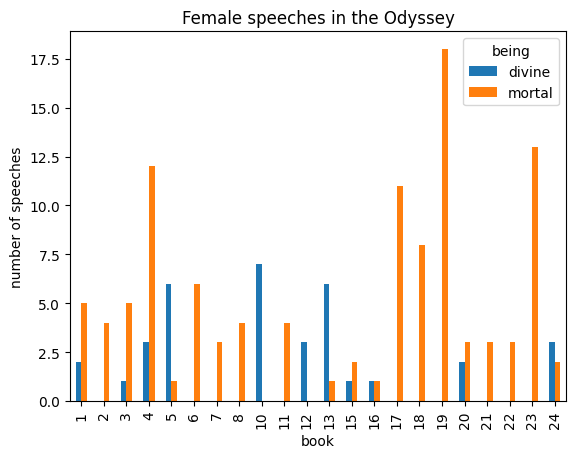

In [17]:
# generate a bar graph
plot_by_book = count_Odspeeches.plot.bar(title="Female speeches in the Odyssey", ylabel="number of speeches")

# save to an image file
plot_by_book.figure.savefig("Odspeeches_count.png")

### More aggregation options

Let's do a second summary, this time looking at the number of lines spoken by mortal women and goddesses in each book of the poem. The rows and columns of our summary table will be the same as last time. But now the values will come from `num_lines` and the aggregation function will be `"sum"` instead of `"count"`.

In [18]:
lines_by_being = table.pivot_table(index="book", columns="being", values="num_lines", aggfunc="sum")
lines_by_being.to_csv("lines_by_being.csv", index=False)
display(lines_by_being)

being,divine,mortal
book,,
1,33.0,107.0
2,NaN,44.0
3,7.0,39.0
4,43.0,127.0
5,78.0,12.0
6,NaN,117.0
7,NaN,42.0
8,NaN,13.0
10,76.0,NaN


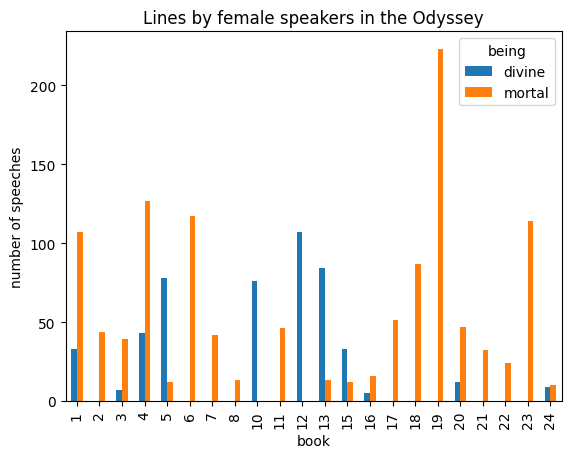

In [19]:
# generate a bar graph
plot_by_line = lines_by_being.plot.bar(title="Lines by female speakers in the Odyssey", ylabel="number of speeches")

# save to an image file
plot_by_line.figure.savefig("Odspeeches_count_by_line.png")